In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import PIL
import cv2
import matplotlib.pyplot as plt
import pathlib

In [4]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='', untar=True)

In [5]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [6]:
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [7]:
img_count=len(list(data_dir.glob("*/*.jpg")))
img_count

3670

In [8]:
roses=list(data_dir.glob("roses/*"))

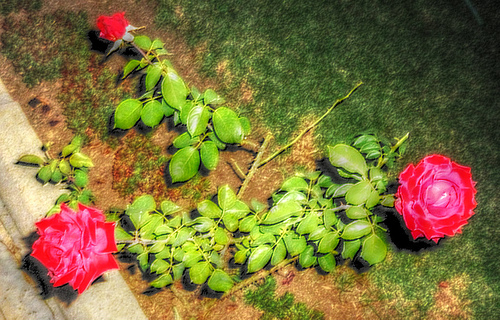

In [9]:
PIL.Image.open(str(roses[2]))

In [10]:
flowers_images_dict={
    'roses':list(data_dir.glob("roses/*")),
    'daisy':list(data_dir.glob("daisy/*")),
    'dandelion':list(data_dir.glob("dandelion/*")),
    'sunflowers':list(data_dir.glob("sunflowers/*")),
    'tulips':list(data_dir.glob("tulips/*"))
}

In [11]:
flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [12]:
str(flowers_images_dict['tulips'][0])

'/tmp/.keras/datasets/flower_photos/tulips/5661431592_cea1108261_n.jpg'

array([[[ 29,  56, 237],
        [ 56,  83, 227],
        [ 63, 102, 231],
        ...,
        [  9,   0,  87],
        [  7,  39, 110],
        [ 31,  96, 205]],

       [[ 57, 101, 194],
        [ 87, 144, 219],
        [ 64, 146, 218],
        ...,
        [ 11,  17,  54],
        [  0,   0,  56],
        [ 35,  62, 148]],

       [[ 44,  82, 190],
        [ 47,  77, 188],
        [ 43,  94, 186],
        ...,
        [ 18,  27,  30],
        [  9,  12,  43],
        [  0,  21,  48]],

       ...,

       [[  0,  46,  23],
        [  1,  49,  25],
        [  1,  52,  25],
        ...,
        [  2,  44,  27],
        [  8,  53,  37],
        [ 10,  59,  43]],

       [[  0,  43,  22],
        [  0,  44,  21],
        [  1,  49,  25],
        ...,
        [  1,  43,  25],
        [ 13,  56,  41],
        [ 13,  58,  42]],

       [[  2,  42,  24],
        [  0,  42,  21],
        [  1,  49,  25],
        ...,
        [  0,  42,  24],
        [ 22,  64,  47],
        [ 21,  63,  46]]], dtype=uint8)
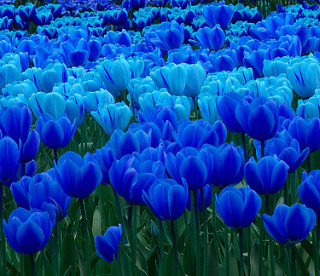

In [13]:
img=cv2.imread(str(flowers_images_dict['tulips'][1]))
img

In [14]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [15]:
X,y=[],[]
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img, (180,180))
    y.append(flowers_label_dict[flower_name])
    X.append(resized_img)

In [16]:
X=np.array(X)
y=np.array(y)
X[:5]

array([[[[ 70, 153, 169],
         [ 78, 141, 158],
         [ 92, 152, 168],
         ...,
         [  6,   4,   4],
         [  7,   5,   5],
         [  4,   4,   4]],

        [[ 78, 152, 163],
         [ 85, 150, 161],
         [124, 152, 168],
         ...,
         [  7,   6,   6],
         [  8,   6,   6],
         [  8,   6,   6]],

        [[ 92, 153, 162],
         [ 91, 151, 160],
         [104, 138, 149],
         ...,
         [  8,   8,   8],
         [  9,   8,   8],
         [ 12,  10,  10]],

        ...,

        [[ 21,  23,  23],
         [  9,  23,  26],
         [ 31,  43,  43],
         ...,
         [ 16, 184, 229],
         [ 12, 175, 222],
         [ 28, 189, 237]],

        [[ 14,  16,  19],
         [ 25,  43,  53],
         [ 28,  47,  58],
         ...,
         [  9, 162, 217],
         [  8, 163, 216],
         [ 18, 174, 223]],

        [[ 31,  34,  39],
         [ 26,  46,  63],
         [ 20,  44,  64],
         ...,
         [  0, 133, 198],
        

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# Print lengths of train and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 2752
Test set size: 918


In [19]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes=5
# Example CNN structure with specified input shape and flattened length
model = Sequential([
    layers.InputLayer(input_shape=(180, 180, 3)),  # Input shape for 180x180 RGB images
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Flattening the 3D output to 1D vector
    layers.Flatten(),

    # Dense layer with matching number of neurons to the flattened length
    layers.Dense(128, activation='relu'),

    # Example output layer for classification
    layers.Dense(num_classes, activation='softmax')
])



In [21]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 90s 1s/step - loss: 1.4357 - accuracy: 0.3775
Epoch 2/30
86/86 [==============================] - 87s 1s/step - loss: 1.0949 - accuracy: 0.5592
Epoch 3/30
86/86 [==============================] - 90s 1s/step - loss: 0.9104 - accuracy: 0.6483
Epoch 4/30
86/86 [==============================] - 93s 1s/step - loss: 0.7357 - accuracy: 0.7173
Epoch 5/30
86/86 [==============================] - 87s 1s/step - loss: 0.5723 - accuracy: 0.7885
Epoch 6/30
86/86 [==============================] - 88s 1s/step - loss: 0.3452 - accuracy: 0.8819
Epoch 7/30
86/86 [==============================] - 88s 1s/step - loss: 0.2073 - accuracy: 0.9331
Epoch 8/30
86/86 [==============================] - 88s 1s/step - loss: 0.0948 - accuracy: 0.9724
Epoch 9/30
86/86 [==============================] - 88s 1s/step - loss: 0.0724 - accuracy: 0.9811
Epoch 10/30
86/86 [==============================] - 90s 1s/step - loss: 0.0450 - accuracy: 0.9873
Epoch 11/30
86/86 [

In [23]:
# Assuming X_test and y_test are defined and properly preprocessed
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


29/29 [==============================] - 10s 339ms/step - loss: 2.9168 - accuracy: 0.6569
Test loss: 2.9168429374694824
Test accuracy: 0.656862735748291


In [24]:
# Assuming your model is already trained and X_test, y_test are defined
predictions = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score

# Assuming predictions are one-hot encoded, convert them to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Test accuracy: {accuracy}')


29/29 [==============================] - 12s 408ms/step
Test accuracy: 0.6568627450980392


In [25]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
    # Add more preprocessing layers as needed
])


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

num_classes = 5

# Data augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal", input_shape=(180, 180, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
    # Add more preprocessing layers as needed
])

# Example CNN structure with specified input shape and flattened length
model = Sequential([
    data_augmentation,  # Data augmentation as the first layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Flattening the 3D output to 1D vector
    layers.Flatten(),

    # Dense layer with matching number of neurons to the flattened length
    layers.Dense(128, activation='relu'),

    # Example output layer for classification
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30)
# Assuming X_test and y_test are defined and properly preprocessed


Epoch 1/30
86/86 [==============================] - 108s 1s/step - loss: 1.3277 - accuracy: 0.4211
Epoch 2/30
86/86 [==============================] - 104s 1s/step - loss: 1.0714 - accuracy: 0.5712
Epoch 3/30
86/86 [==============================] - 107s 1s/step - loss: 0.9691 - accuracy: 0.6279
Epoch 4/30
86/86 [==============================] - 103s 1s/step - loss: 0.8975 - accuracy: 0.6555
Epoch 5/30
86/86 [==============================] - 103s 1s/step - loss: 0.8473 - accuracy: 0.6842
Epoch 6/30
86/86 [==============================] - 105s 1s/step - loss: 0.7982 - accuracy: 0.6999
Epoch 7/30
86/86 [==============================] - 103s 1s/step - loss: 0.7637 - accuracy: 0.7129
Epoch 8/30
86/86 [==============================] - 102s 1s/step - loss: 0.7262 - accuracy: 0.7278
Epoch 9/30
86/86 [==============================] - 101s 1s/step - loss: 0.7050 - accuracy: 0.7329
Epoch 10/30
86/86 [==============================] - 101s 1s/step - loss: 0.6700 - accuracy: 0.7540
Epoch 11/

In [29]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Assuming your model is already trained and X_test, y_test are defined
predictions = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score

# Assuming predictions are one-hot encoded, convert them to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Test accuracy: {accuracy}')




29/29 [==============================] - 9s 309ms/step - loss: 0.8544 - accuracy: 0.7625
Test loss: 0.8543887734413147
Test accuracy: 0.7625272274017334
29/29 [==============================] - 8s 282ms/step
Test accuracy: 0.7625272331154684
